In [176]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# %matplotlib notebook
#Import data
csv_data = pd.read_csv("Resources/movie_metadata.csv", encoding="utf-8")
df = pd.DataFrame(csv_data)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [2]:
df.count()

color                        5024
director_name                4939
num_critic_for_reviews       4993
duration                     5028
director_facebook_likes      4939
actor_3_facebook_likes       5020
actor_2_name                 5030
actor_1_facebook_likes       5036
gross                        4159
genres                       5043
actor_1_name                 5036
movie_title                  5043
num_voted_users              5043
cast_total_facebook_likes    5043
actor_3_name                 5020
facenumber_in_poster         5030
plot_keywords                4890
movie_imdb_link              5043
num_user_for_reviews         5022
language                     5031
country                      5038
content_rating               4740
budget                       4551
title_year                   4935
actor_2_facebook_likes       5030
imdb_score                   5043
aspect_ratio                 4714
movie_facebook_likes         5043
dtype: int64

In [3]:
# delete all the rows with missing values
df_clean=df.dropna()

In [56]:
# select columns of interest to create new dataframe
imdb=df_clean[["movie_title","imdb_score","duration","content_rating","budget","aspect_ratio","title_year","country","language","gross"]].sort_values(by=["imdb_score"],ascending=False)

In [95]:
imdb["profit"]=imdb["gross"]-imdb["budget"]

In [96]:
# preview the dataset
imdb.head()

,movie_title,imdb_score,duration,content_rating,budget,aspect_ratio,title_year,country,language,gross,profit
1937,The Shawshank Redemption,9.3,142.0,R,25000000.0,1.85,1994.0,USA,English,28341469.0,3341469.0
3466,The Godfather,9.2,175.0,R,6000000.0,1.85,1972.0,USA,English,134821952.0,128821952.0
66,The Dark Knight,9.0,152.0,PG-13,185000000.0,2.35,2008.0,USA,English,533316061.0,348316061.0
2837,The Godfather: Part II,9.0,220.0,R,13000000.0,1.85,1974.0,USA,English,57300000.0,44300000.0
339,The Lord of the Rings: The Return of the King,8.9,192.0,PG-13,94000000.0,2.35,2003.0,USA,English,377019252.0,283019252.0


In [66]:
# clean up content rating. replace "Unrated" with "Not Rated"
imdb["content_rating"]=imdb["content_rating"].replace({"Unrated":"Not Rated"})

In [67]:
#keep cleaning the dataset by deleting ambiguous content rating
imdb_rt=imdb.loc[imdb["content_rating"] != "Approved"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "X"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "Passed"]
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "M"] 
imdb_rt=imdb_rt.loc[imdb_rt["content_rating"] != "GP"]

In [68]:
#
imdb_rt["content_rating"].value_counts()

R            1700
PG-13        1308
PG            566
G              87
Not Rated      56
NC-17           6
Name: content_rating, dtype: int64

In [75]:
imdb_rt["title_year"].value_counts()

2002.0    190
2006.0    189
2008.0    182
2005.0    182
2009.0    182
         ... 
1962.0      1
1933.0      1
1959.0      1
1952.0      1
1939.0      1
Name: title_year, Length: 65, dtype: int64

In [60]:
imdb_rt.describe()

,imdb_score,duration,budget,aspect_ratio,title_year,gross
count,3723.000000,3723.000000,3.723000e+03,3723.000000,3723.000000,3.723000e+03
mean,6.459361,110.229922,4.660233e+07,2.113049,2003.312651,5.276966e+07
std,1.056250,22.464870,2.269758e+08,0.351634,9.132967,7.051319e+07
min,1.600000,45.000000,2.180000e+02,1.180000,1927.000000,1.620000e+02
25%,5.900000,96.000000,1.000000e+07,1.850000,1999.000000,8.340925e+06
50%,6.600000,106.000000,2.500000e+07,2.350000,2005.000000,3.012796e+07
75%,7.200000,120.000000,5.000000e+07,2.350000,2010.000000,6.709472e+07
max,9.300000,330.000000,1.221550e+10,16.000000,2016.000000,7.605058e+08


## Exploratory analysis

In [157]:
#duration statistics for movie length
imdb_rt["duration"].describe()

count    3723.000000
mean      110.229922
std        22.464870
min        45.000000
25%        96.000000
50%       106.000000
75%       120.000000
max       330.000000
Name: duration, dtype: float64

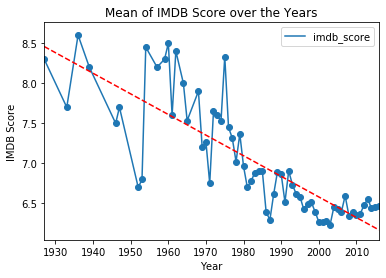

In [156]:
imdb_rt_group=imdb_rt.groupby(["title_year"])
# Store the Mean 
rt_mean=imdb_rt_group["imdb_score"].mean()
# Convert to DataFrame
rt_mean_df=pd.DataFrame(rt_mean).reset_index()
# Preview DataFrame
rt_mean_df.head()

#Mean IMDB score over the years
rt_mean_df.plot.line("title_year","imdb_score")
x = rt_mean_df['title_year']
y = rt_mean_df['imdb_score']
plt.scatter(x, y)
#add trendline for the mean IMDB score
z = np.polyfit(x, y, 1)
trendline = np.poly1d(z)
plt.xlabel("Year")
plt.ylabel("IMDB Score")
plt.title("Mean of IMDB Score over the Years")
plt.plot(x,p(x),"r--")
plt.savefig("Images/Mean of IMDB over Years.png")
plt.show()


It indicates that mean IMDB score decreased over the years. And there is a sharp decline in the mid 50s.

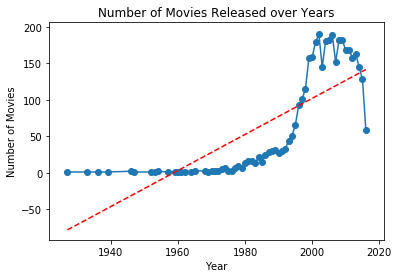

In [174]:

year=imdb_rt["title_year"].unique().astype(int)
year=sorted(year)


num_movie_yr=[]
for i in year:
    tmp=imdb_rt.imdb_score[imdb_rt.title_year==i]
    num_movie_yr.append(len(tmp))
#Mean IMDB score over the years
# plt.line(year,num_movie_yr)

plt.plot(year, num_movie_yr)
plt.scatter(year, num_movie_yr)
#add trendline for the mean IMDB score
z = np.polyfit(year, num_movie_yr, 1)
p = np.poly1d(z)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released over Years")
plt.plot(year,p(year),"r--")
plt.savefig("Images/Number of Movies Released over Years.png")
plt.show()


Combine this graph and the imdb score trend graph, it demonstrates that producers pay much attention to the quantity of movies instead of quality.

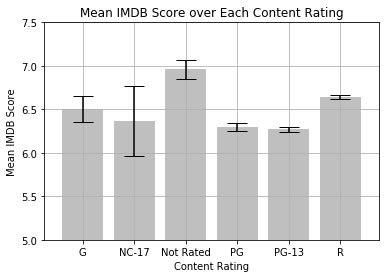

In [148]:
imdb_rt_group=imdb_rt.groupby(["content_rating"])
# Store the Mean and SEM
rt_mean=imdb_rt_group["imdb_score"].mean()
rt_sem=imdb_rt_group["imdb_score"].sem()
# Convert to DataFrame
rt_mean_df=pd.DataFrame(rt_mean).reset_index()
rt_sem_df=pd.DataFrame(rt_sem).reset_index()
content_rt=imdb_rt["content_rating"].unique()
content_rt
x_axis = np.arange(len(content_rt))
plt.bar(x_axis,rt_mean_df["imdb_score"],yerr=rt_sem_df["imdb_score"],color="grey",alpha=0.5,capsize=10,align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["G", "NC-17", "Not Rated", "PG", "PG-13", "R"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(5, 7.5)

# Set up the x_axis and y_axis limits

plt.grid()
plt.title("Mean IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Mean IMDB Score")
plt.savefig("Images/Mean IMDB score over Content Rating.png")
plt.show()


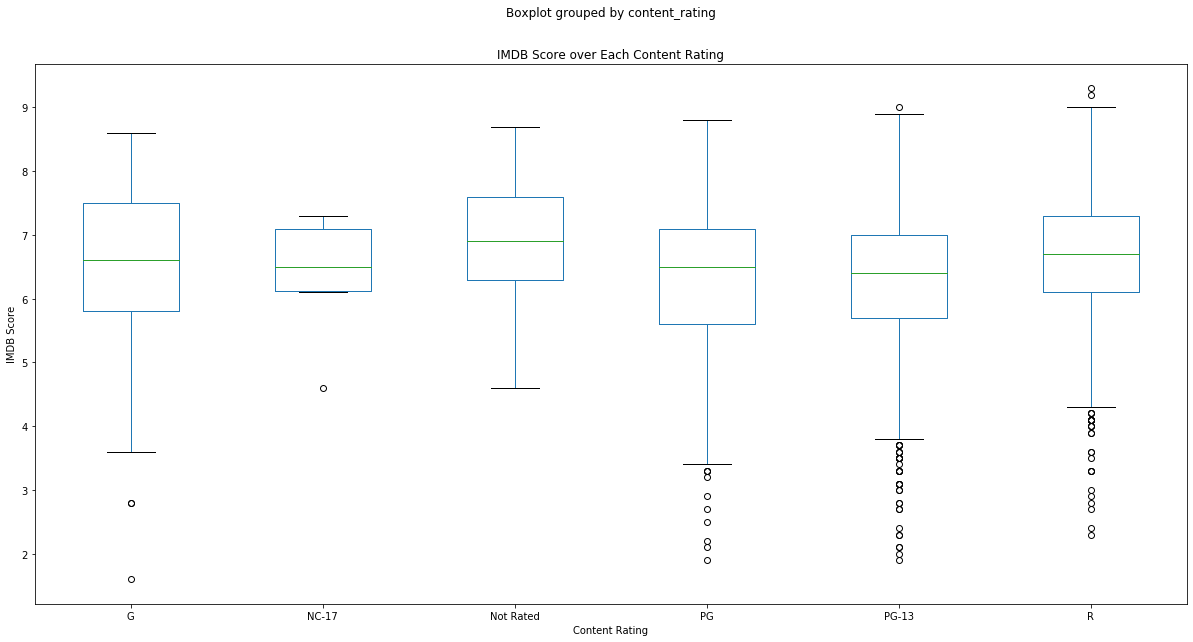

In [175]:
imdb_rt.boxplot("imdb_score",by="content_rating",figsize=(20,10))
plt.grid()
plt.title("IMDB Score over Each Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("IMDB Score")
plt.savefig("Images/IMDB score over Content Rating_boxplot.png")
plt.show()


In [141]:
# Extract individual groups
group1 = df[df["content_rating"] == "G"]["imdb_score"]
group2 = df[df["content_rating"] == "NC-17"]["imdb_score"]
group3 = df[df["content_rating"] == "Not Rated"]["imdb_score"]
group4 = df[df["content_rating"] == "PG"]["imdb_score"]
group5 = df[df["content_rating"] == "PG-13"]["imdb_score"]
group6 = df[df["content_rating"] == "R"]["imdb_score"]

In [142]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5,group6)

F_onewayResult(statistic=13.230863195290338, pvalue=8.038882820707267e-13)

P-value is less than 0.05, so the IMDB scores are significantly different among 6 content ratings.

Reference:
1) Trendline for Mean IMDB Score over Years was taken from the stackoverflow answer below:  
    https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
2) Number of Movie by Year was taken from below link:
    https://www.kaggle.com/aninda123/imdb-movie-analysis